# Pylops - LSQR

### Author: M.Ravasi

In this notebook I compare scipy and pylops LSQR

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

#import warnings
#warnings.filterwarnings('ignore')

import numpy as np
import cupy as cp
import matplotlib.pyplot as plt
import scipy as sp

from scipy.sparse.linalg import lsqr as sp_lsqr
from pylops.basicoperators import *
from pylops.optimization.basic import lsqr, cgls

In [2]:
for idev in range(cp.cuda.runtime.getDeviceCount()):
    print(cp.cuda.runtime.getDeviceProperties(idev)['name'])

cp.cuda.Device(device=0).use()

b'NVIDIA GeForce RTX 3090'
b'Quadro RTX 4000'


## LSQR with zero initial guess

 
LSQR            Least-squares solution of  Ax = b
The matrix A has 50 rows and 50 columns
damp = 1.00000000000000e-10   calc_var =        0
atol = 1.00e-10                 conlim = 1.00e+12
btol = 1.00e-10               iter_lim =       50
 
   Itn      x[0]       r1norm     r2norm   Compatible    LS      Norm A   Cond A
     0  0.00000e+00   4.504e+01  4.504e+01    1.0e+00  2.0e-01
     1 -7.54121e-01   2.011e+01  2.011e+01    4.5e-01  7.6e-01   1.0e+01  1.0e+00
     2 -3.96675e-01   1.255e+01  1.255e+01    2.8e-01  4.2e-01   1.5e+01  2.1e+00
     3 -1.98663e-01   8.690e+00  8.690e+00    1.9e-01  3.5e-01   1.8e+01  3.5e+00
     4 -1.02428e-01   6.237e+00  6.237e+00    1.4e-01  2.3e-01   2.1e+01  5.0e+00
     5  1.68220e-02   5.085e+00  5.085e+00    1.1e-01  2.0e-01   2.3e+01  6.5e+00
     6  1.76055e-01   3.932e+00  3.932e+00    8.7e-02  1.5e-01   2.5e+01  8.5e+00
     7  3.18872e-01   3.162e+00  3.162e+00    7.0e-02  1.7e-01   2.6e+01  1.0e+01
     8  4.34752e-01   2.493e+00  2.493

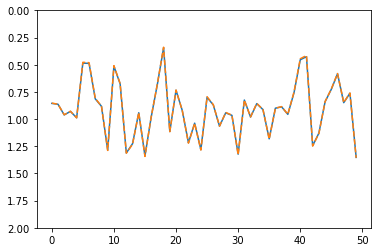

In [3]:
par = {'n': 50, 'm': 50, 'k': 14,
        'dtype': np.float64, 'sparse': False} # square

# Create random m-by-n encoding matrix
m = par['m']
n = par['n']
A = np.random.normal(0, 1, (m, n))
Aop = MatrixMult(A)
x = np.ones(n)
y = A.dot(x)

damp = 1e-10
atol = 1e-10
btol = 1e-10
conlim = 1e12
itn_max = 50
show = True

# Without initial guess
xinv_sp, istop_sp, itn_sp, r1norm_sp, r2norm_sp, anorm_sp, \
acond_sp, arnorm_sp, xnorm_sp, var_sp = \
    sp_lsqr(Aop, y, damp, atol, btol, conlim, itn_max, show)

xinv, istop, itn, r1norm, r2norm, anorm, acond, arnorm, xnorm, var, cost = \
    lsqr(Aop, y, np.zeros(n), damp, atol, btol, conlim, itn_max, True, show)

plt.figure()
plt.plot(xinv)
plt.plot(xinv_sp, '--')
plt.ylim(2, 0);

## LSQR with non-zero initial guess

 
LSQR            Least-squares solution of  Ax = b
The matrix A has 50 rows and 50 columns
damp = 1.00000000000000e-10   calc_var =        0
atol = 1.00e-10                 conlim = 1.00e+12
btol = 1.00e-10               iter_lim =      100
 
   Itn      x[0]       r1norm     r2norm   Compatible    LS      Norm A   Cond A
     0  9.86181e-01   7.348e+01  7.348e+01    1.0e+00  1.2e-01
     1  2.47825e+00   3.644e+01  3.644e+01    6.8e-01  7.5e-01   1.0e+01  1.0e+00
     2  1.79121e+00   2.236e+01  2.236e+01    4.2e-01  4.7e-01   1.5e+01  2.2e+00
     3  1.17357e+00   1.227e+01  1.227e+01    2.3e-01  3.6e-01   1.8e+01  3.6e+00
     4  1.27131e+00   8.141e+00  8.141e+00    1.5e-01  3.1e-01   2.0e+01  5.0e+00
     5  1.42680e+00   6.164e+00  6.164e+00    1.2e-01  2.1e-01   2.3e+01  6.4e+00
     6  1.46220e+00   4.918e+00  4.918e+00    9.2e-02  1.6e-01   2.5e+01  8.0e+00
     7  1.39463e+00   4.289e+00  4.289e+00    8.0e-02  1.4e-01   2.7e+01  9.5e+00
     8  1.25934e+00   3.566e+00  3.566

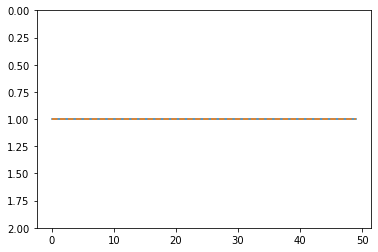

In [4]:
par = {'n': 50, 'm': 50, 'k': 14,
        'dtype': np.float64, 'sparse': False} # square

# Create random m-by-n encoding matrix
m = par['m']
n = par['n']
A = np.random.normal(0, 1, (m, n))
Aop = MatrixMult(A)
x = np.ones(n)
y = A.dot(x)

damp = 1e-10
atol = 1e-10
btol = 1e-10
conlim = 1e12
itn_max = 100
show = True

x0 = np.random.normal(0, 1, n)

# With initial guess
xinv_sp, istop_sp, itn_sp, r1norm_sp, r2norm_sp, anorm_sp, \
acond_sp, arnorm_sp, xnorm_sp, var_sp = \
sp_lsqr(Aop, y, damp, atol, btol, conlim, itn_max, show, x0=x0)
#    sp_lsqr(Aop, y - Aop * x0, damp, atol, btol, conlim, itn_max, show)
#xinv_sp += x0
xinv, istop, itn, r1norm, r2norm, anorm, acond, arnorm, xnorm, var, cost = \
    lsqr(Aop, y, x0, damp, atol, btol, conlim, itn_max, True, show)

plt.figure()
plt.plot(xinv)
plt.plot(xinv_sp, '--')
plt.ylim(2, 0);

## LSQR on gpu

LSQR
------------------------------------------------------------------------------------------
The Operator Op has 7000 rows and 7000 cols
damp = 1.00000000000000e-10     calc_var =      1
atol = 1.00e-10                 conlim = 1.00e+12
btol = 1.00e-10                 niter =      300
------------------------------------------------------------------------------------------
   Itn     x[0]      r1norm     r2norm   Compatible   LS     Norm A   Cond A
     0  1.0358e+00  9.890e+03  9.890e+03   1.0e+00  1.2e-02
     1  1.3390e+00  4.437e+03  4.437e+03   4.5e-01  3.5e-01  1.3e+02  1.0e+00
     2  1.0556e+00  2.641e+03  2.641e+03   2.7e-01  1.7e-01  1.8e+02  2.2e+00
     3  6.8208e-01  1.809e+03  1.809e+03   1.8e-01  1.0e-01  2.2e+02  3.5e+00
     4  5.5841e-01  1.350e+03  1.350e+03   1.4e-01  7.1e-02  2.5e+02  5.0e+00
     5  6.3365e-01  1.053e+03  1.053e+03   1.1e-01  5.1e-02  2.7e+02  6.6e+00
     6  6.1827e-01  8.553e+02  8.553e+02   8.6e-02  3.8e-02  3.0e+02  8.3e+00
     7  5.7508e

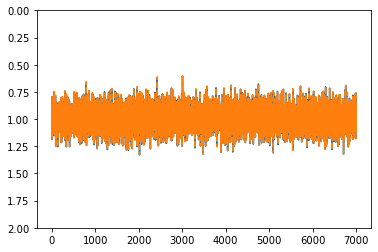

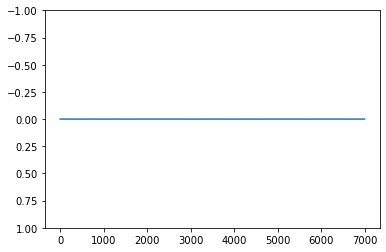

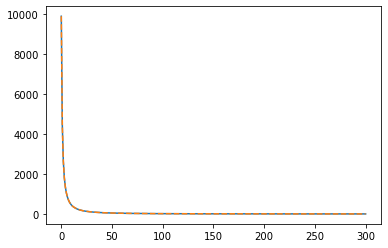

In [5]:
# Create random m-by-n encoding matrix
m, n = 7000, 7000
A = np.random.normal(0, 1, (m, n))
Aop = MatrixMult(A)
x = np.ones(n)
y = A.dot(x)

damp = 1e-10
atol = 1e-10
btol = 1e-10
conlim = 1e12
itn_max = 300
show = True
x0 = np.random.normal(0, 1, n)
Aop = MatrixMult(A)
Aop_cp = MatrixMult(cp.asarray(A))

xinv, istop, itn, r1norm, r2norm, anorm, acond, arnorm, xnorm, var, cost = \
    lsqr(Aop, y, x0, damp, atol, btol, conlim, itn_max, True, show)

xinv_cp, istop_cp, itn_cp, r1norm_cp, r2norm_cp, anorm_cp, acond_cp, arnorm_cp, xnorm_cp, var_cp, cost_cp = \
    lsqr(Aop_cp, cp.asarray(y), cp.asarray(x0), damp, atol, btol, conlim, itn_max, True, show)

plt.figure()
plt.plot(xinv)
plt.plot(cp.asnumpy(xinv_cp), '--')
plt.ylim(2, 0)

plt.figure()
plt.plot(xinv - cp.asnumpy(xinv_cp))
plt.ylim(1, -1);

plt.figure()
plt.plot(cost)
plt.plot(cp.asnumpy(cost_cp), '--');